In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
import random as rnd
from random import sample

In [4]:
census = pd.read_csv("CensusAndExpectancyIL.csv")

In [5]:
census.head(5)

,Unnamed: 0,Tract,FIPS,Area (Land),Total Population:,% Total Population: White Alone,% Total Population: Black or African American Alone,Population 25 Years and Over:,Civilian Population in Labor Force 16 Years and Over:,% Civilian Population in Labor Force 16 Years and Over: Employed,...,% Total: No Health Insurance Coverage,% Total: with Health Insurance Coverage,% Total: with Health Insurance Coverage: Public Health Coverage,% Total: with Health Insurance Coverage: Private Health Insurance,"% Households: Less than $39,999","% Households: $40,000 to $74,999","% Households: $75,000 or More",% High School or Less,% Bachelor's or More,Life Expectancy
0,0,Adams County 0001.00,17001000100,14087146,4607,90.71,6.19,3425,2329,92.79,...,3.15,96.85,48.10,68.76,35.96,34.71,29.32,40.52,21.55,85.3
1,1,Adams County 0002.01,17001000201,3206319,2003,90.66,6.54,1365,990,97.68,...,6.44,93.56,40.49,66.45,44.91,23.83,31.25,39.41,24.91,78.1
2,2,Adams County 0002.02,17001000202,1514956,2391,84.53,10.25,1541,1409,93.12,...,10.87,89.13,28.69,71.14,36.50,43.86,19.64,39.00,16.55,78.2
3,3,Adams County 0004.00,17001000400,4443142,3314,77.46,13.70,2311,1355,95.79,...,4.34,95.66,55.61,49.66,51.47,27.92,20.61,59.15,9.65,66.2
4,4,Adams County 0005.00,17001000500,1262517,2154,84.68,8.17,1458,839,96.31,...,7.33,92.67,50.08,50.66,50.82,32.92,16.26,52.81,13.17,71.6


In [15]:
model = LR()
outcome = "Life Expectancy"
predictors = "% Households: Less than $39,999"
x_data = np.array(census[predictors]).reshape(-1,1)
y_data = np.array(census[outcome]).reshape(-1,1)

In [16]:
model.fit(x_data, y_data)

LinearRegression()

In [40]:
x = x_data.reshape(1, -1)[0]
y = y_data.reshape(1, -1)[0]
model_x = np.linspace(min(x), max(x), 40)
model_y = model.predict(model_x.reshape(-1,1)).flatten()

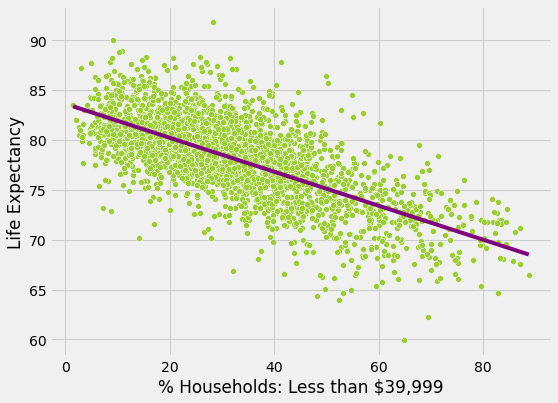

In [18]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=census, x=predictors, y=outcome, color="yellowgreen")
#sns.lineplot(x=model_x, y=model_y, color="purple")
plt.plot(model_x, model_y, color="purple")

In [10]:
N= 30
idx = rnd.sample(range(len(x)), N)
smpl_x, smpl_y = x[idx].reshape(-1, 1), y[idx].reshape(-1,1)
smpl_y_hat = model.predict(smpl_x)
residuals = smpl_y - smpl_y_hat

In [11]:
smpl_x, smpl_y = smpl_x.reshape(1,-1)[0], smpl_y.reshape(1,-1)[0]
smpl_y_hat = smpl_y_hat.reshape(1,-1)[0]
residuals = residuals.reshape(1,-1)[0]

[Text(0.5, 0, '% Households: Less than $39,999'),
 Text(0, 0.5, 'Life Expectancy')]

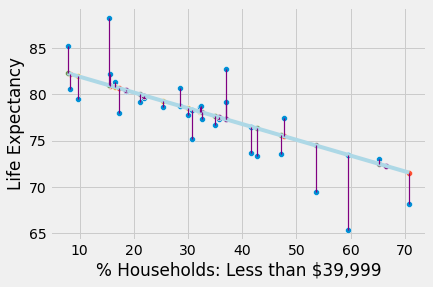

In [12]:
plt.figure()
ax = sns.scatterplot(x=smpl_x, y=smpl_y)
sns.lineplot(x=smpl_x, y=smpl_y_hat, color="lightblue")
for k in range(len(residuals)):
    line_x = [smpl_x[k], smpl_x[k]]
    line_y = smpl_y_hat[k] + [0, residuals[k]]
    sns.lineplot(x=line_x, y=line_y, color="purple", dashes=True, estimator=None,linewidth=1.2)
    sns.scatterplot(x=line_x, y=smpl_y_hat[k])
ax.set(xlabel=predictors, ylabel=outcome)

In [13]:
smpl_y_bar = smpl_y.mean()
        
SST = ((smpl_y-smpl_y_bar)**2).sum()
SSR = ((smpl_y_hat-smpl_y_bar)**2).sum()
SSE = ((smpl_y_hat-smpl_y)**2).sum()


print(SST)
print(SSR)
print(SSE)


if SSE + SSR == SST:
    print("SSE + SSR is equal to SST")
else:
    print("SSE + SSR is " + str(SSE + SSR) + " and not " + str(SST))
    

684.2386666666664
262.5216056762327
256.8787506653126
SSE + SSR is 519.4003563415454 and not 684.2386666666664


In [46]:
model_y = model.predict(x.reshape(-1,1))
residualsy = y - model_y

In [47]:
x, y = x.reshape(1,-1)[0], y.reshape(1,-1)[0]
model_y = model_y.reshape(1,-1)[0]
residualsy = residualsy.reshape(1,-1)[0]

In [53]:
x, y = x.reshape(1,-1)[0], y.reshape(1,-1)[0]
model_y = model_y.reshape(1,-1)[0]
y_bar = y.mean()
y_bar.reshape(1,-1)[0]

SST_R = ((y-y_bar)**2).sum()
SSR_R = ((model_y-y_bar)**2).sum()
SSE_R = ((model_y-y)**2).sum()


print("SST is " + str(SST_R))
print("SSR is " + str(SSR_R))
print("SSE is " + str(SSE_R))


if int(SSE_R + SSR_R) == int(SST_R):
    print("SSE + SSR is equal to SST")
    print("SSE + SSR is " + str(SST_R))
else:
    print("SSE + SSR is " + str(SSE_R + SSR_R) + " and not " + str(SST_R))

SST is 45479.622684076894
SSR is 21761.231886809535
SSE is 23718.390797267366
SSE + SSR is equal to SST
SSE + SSR is 45479.622684076894
